In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'emails.csv')

In [3]:
df.head(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


# Data Preprocessing

In [4]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

# Data Cleaning

In [5]:
cleaned_emails = df.drop(columns=['Email No.'])
cleaned_emails

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

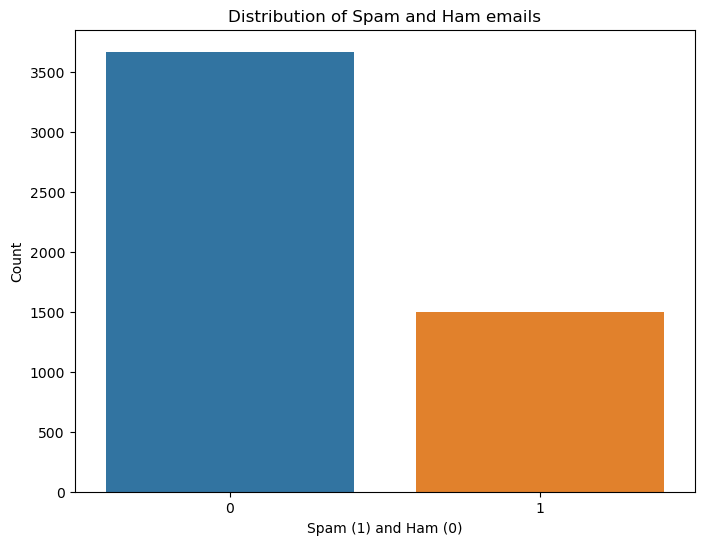

In [7]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Prediction' , data = cleaned_emails)
plt.title("Distribution of Spam and Ham emails")
plt.xlabel("Spam (1) and Ham (0)")
plt.ylabel("Count")
plt.show()

In [8]:
x = cleaned_emails.drop(columns = ['Prediction'])
y = cleaned_emails['Prediction']

# Model Training and Testing

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=42)

In [11]:
from sklearn.naive_bayes import MultinomialNB

In [12]:
nb_classifier = MultinomialNB()

In [13]:
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [14]:
y_predict = nb_classifier.predict(x_test)

In [15]:
y_predict

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,

In [22]:
from sklearn.metrics import accuracy_score, classification_report

In [25]:
nb_accuracy = accuracy_score(y_test, y_predict)
nb_report = classification_report(y_test, y_predict)

print("\n Support Vector Machine Classifier")
print("Accuracy", nb_accuracy)
print("Classification Report", nb_report)


 Support Vector Machine Classifier
Accuracy 0.9536679536679536
Classification Report               precision    recall  f1-score   support

           0       0.99      0.95      0.97       365
           1       0.89      0.97      0.92       153

    accuracy                           0.95       518
   macro avg       0.94      0.96      0.95       518
weighted avg       0.96      0.95      0.95       518



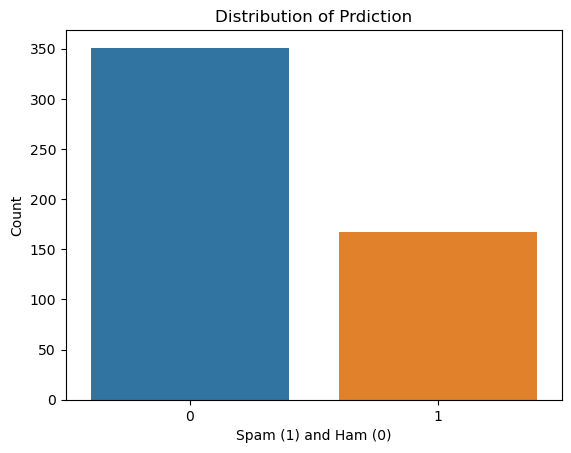

In [16]:
sns.countplot(x = y_predict)
plt.title("Distribution of Prdiction")
plt.xlabel("Spam (1) and Ham (0)")
plt.ylabel("Count")
plt.show()

In [17]:
from sklearn.svm import SVC

In [18]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [19]:
svm_predict = svm_classifier.predict(x_test)

In [20]:
svm_predict

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

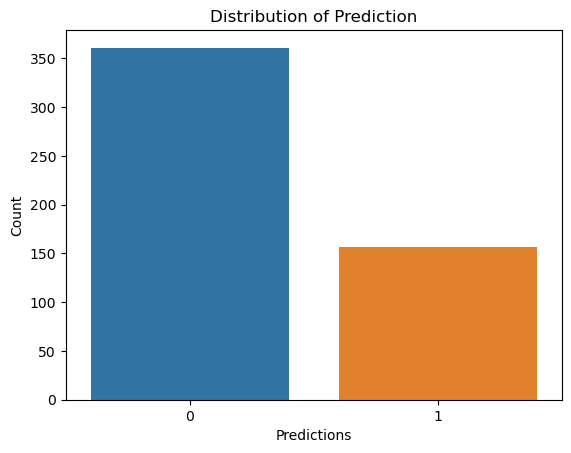

In [21]:
sns.countplot(x = svm_predict)
plt.title("Distribution of Prediction")
plt.xlabel("Predictions")
plt.ylabel("Count")
plt.show()

In [23]:
svm_accuracy = accuracy_score(y_test, svm_predict)
svm_report = classification_report(y_test, svm_predict)

print("\n Support Vector Machine Classifier")
print("Accuracy", svm_accuracy)
print("Classification Report", svm_report)


 Support Vector Machine Classifier
Accuracy 0.9613899613899614
Classification Report               precision    recall  f1-score   support

           0       0.98      0.97      0.97       365
           1       0.92      0.95      0.94       153

    accuracy                           0.96       518
   macro avg       0.95      0.96      0.95       518
weighted avg       0.96      0.96      0.96       518



# Comparison Between Naive Bayes and Support Vector Machine

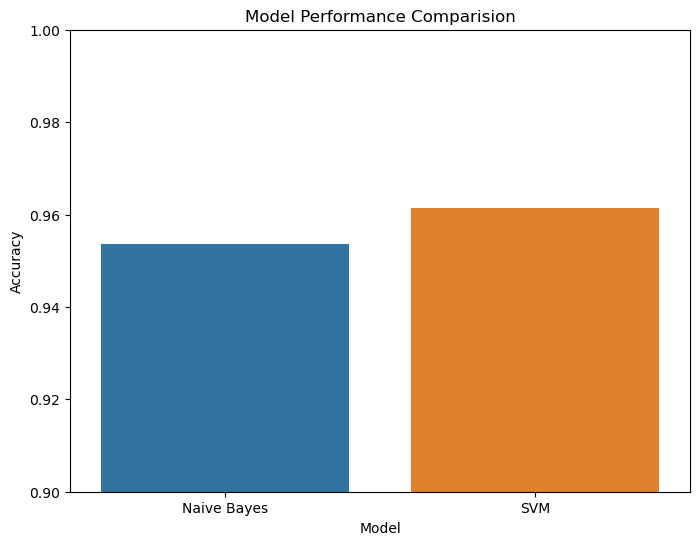

In [27]:
model_performance = pd.DataFrame({
    "Model": ['Naive Bayes', 'SVM'],
    "Accuracy": [nb_accuracy, svm_accuracy]})
plt.figure(figsize=(8,6))
sns.barplot(x = 'Model', y = "Accuracy", data = model_performance)
plt.title("Model Performance Comparision")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.show()